In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer
from collections import Counter
from nltk.text import Text
from nltk import word_tokenize, pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

### Text-Dateien einlesen und ausgeben

In [2]:
df = pd.read_csv("trump_clean.csv", on_bad_lines='skip', lineterminator='\n')

In [3]:
df.head()

,Unnamed: 0,num,text,clean_text
0,0,1,"Last week to enter the ""Think Like A Champion""...",last week enter think like champion signed boo...
1,1,2,- Wishing a Happy Father's Day to all the Dad'...,wishing happy fathers day dads champion today ...
2,2,3,Donald Trump’s commercial-free WWE Raw does bi...,donald trump’s commercialfree wwe raw big rating
3,3,4,and here's another....http://www.trump.com/Gol...,heres another
4,4,5,"@oreillyfactor is having a poll, cast your vot...",poll cast vote


In [4]:
df.isna().tail()

,Unnamed: 0,num,text,clean_text
43132,False,False,False,False
43133,False,False,False,False
43134,False,False,False,True
43135,False,False,False,False
43136,False,False,False,False


In [5]:
df[43134:43134+2]

,Unnamed: 0,num,text,clean_text
43134,43134,43135,https://t.co/VXeKiVzpTf,NaN
43135,43135,43136,The United States of America will be designati...,united states america designating antifa terro...


In [6]:
df = df.dropna()

In [7]:
df[43134:43134+2]

,Unnamed: 0,num,text,clean_text


In [8]:
# Extrahieren von Sätzen
text_df = df["clean_text"]

# Erstellen einer leeren Liste
text = []

# Erweitern der Liste um die Sätze
text.extend(text_df)

# Drucken der Liste
print(text[:100])

['last week enter think like champion signed book keychain contest', 'wishing happy fathers day dads champion today everyday', 'donald trump’s commercialfree wwe raw big rating', 'heres another', 'poll cast vote', 'innocent italian government pay travesty', 'done nothing help', 'stop china curse pass china currency bill', 'sold first week copies ordered holidays dont worry', 'tops 500 best hotels world congrats', 'hes smart man poor journalist likes fabricating truth reasons ratings stink', 'first job working father fred c trump', 'parent education high priority important went one best schools cont', 'already two great pilots', 'every citizen right political analysisand shouldas well endorse cont', 'qa receive great many requests interviews nationally internationally', 'could possibility plans moment season celebrity apprentice greatbe sure watch', 'agenda cant meet always nice asked wish best', 'youll watch find', 'trademarked', 'thanks ill keep', 'disaster despite mandate still 27m u

In [31]:
# Funktion zum Zerlegen von Sätzen in Wörter
def split_sentences(sentences):
  words = []
  for sentence in sentences:
    # Trenne Wörter durch Leerzeichen
    words.extend(re.split(r'\s+', sentence))
  return words

# Konvertieren von Sätzen in Wörter
word_list = split_sentences(text)

# Drucken der Liste der Wörter
print(word_list[:20])

['last', 'week', 'enter', 'think', 'like', 'champion', 'signed', 'book', 'keychain', 'contest', 'wishing', 'happy', 'fathers', 'day', 'dads', 'champion', 'today', 'everyday', 'donald', 'trump’s']


-------

### Word Cloud und Bigramme

#### Word Cloud

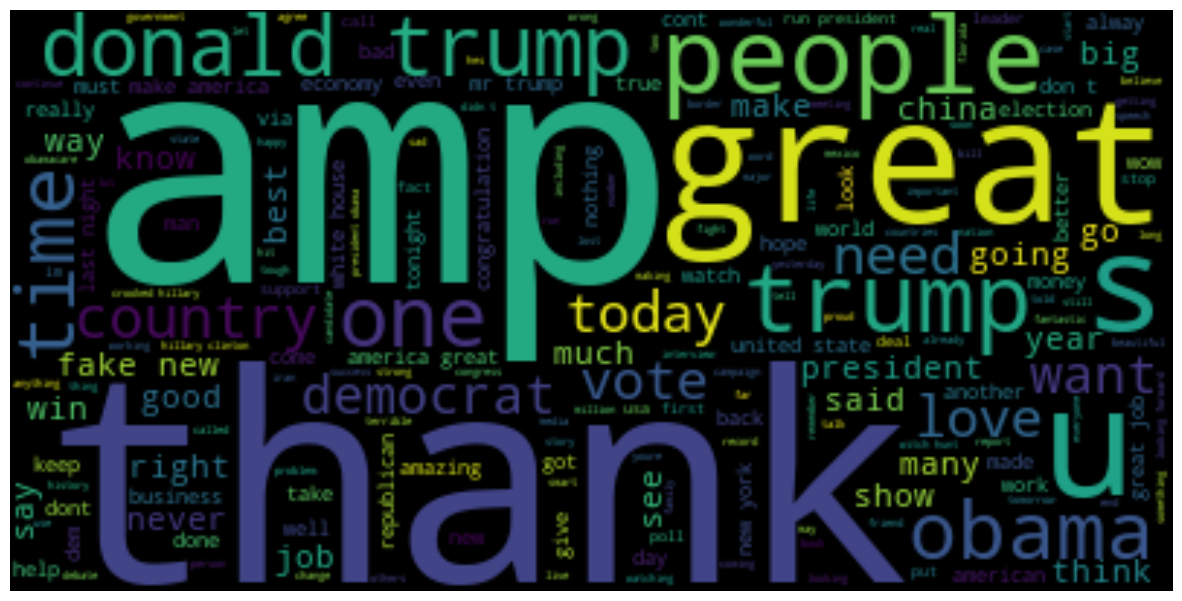

In [24]:
#wordcloud ohne stemming

# Create a new figure
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

# Create and display the Word Cloud
wordcloud = WordCloud(background_color="black", colormap="viridis").generate(" ".join(word_list))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

In [44]:
stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(word) for word in word_list]
print(stemmed_words[:20])

['last', 'week', 'enter', 'think', 'like', 'champion', 'sign', 'book', 'keychain', 'contest', 'wish', 'happi', 'father', 'day', 'dad', 'champion', 'today', 'everyday', 'donald', 'trump']


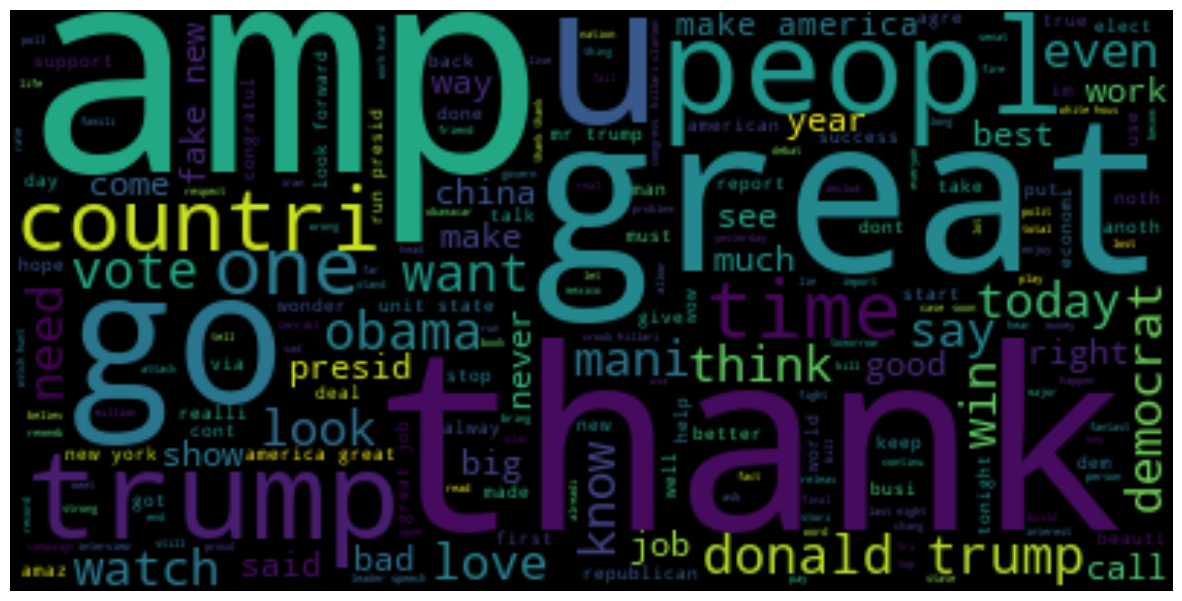

In [45]:
#wordcloud mit stemming
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a new figure
fig = plt.figure(figsize=(15, 15)) #besser: 15, 15
ax = fig.add_subplot(111)

# Create and display the Word Cloud
wordcloud = WordCloud(background_color="black", colormap="viridis").generate(" ".join(stemmed_words))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis("off")

plt.show()

---------

#### Satz-Untersuchungen

In [52]:
textList = Text(word_list)
textList.concordance('war', width=80, lines=5)

Displaying 5 of 194 matches:
 lead great game last night according war terror global warming national cont p
olish oil reserve strageic asset time war embargo open land drilling tap reserv
iraq invaded wrong country really bad war staying trump chicago well done sir p
ald mentioned big fail donald wins tv war went donald j trump necktie buying sp
 senator knows return prosperity real war womenover 175000 fewer held jobs july


In [57]:
#wörter die in ähnlicher reichweite vorhanden sind
textList.similar("war")

vote never deals trump im deal get surplus champion today big poll
cast stop world job pilots right youll idea


In [64]:
#kontext in dem 2 wörter stehen
textList.common_contexts(["war", "trump"])

go_many go_never


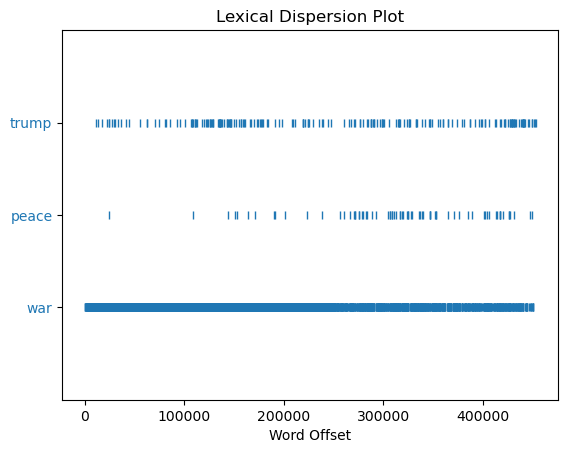

In [65]:
#dispersion plot: in welchen bereichen wörter jeweils vorkommen nach n wörtern 
textList.dispersion_plot(["war", "peace", "trump"])

In [48]:
#20 most frequent words
word_counts = Counter(word_list)
word_counts.most_common(20)

[('great', 6692),
 ('trump', 4739),
 ('amp', 4538),
 ('thank', 3028),
 ('president', 2834),
 ('people', 2722),
 ('us', 2252),
 ('thanks', 2067),
 ('would', 2020),
 ('get', 1972),
 ('new', 1968),
 ('country', 1929),
 ('big', 1733),
 ('like', 1723),
 ('america', 1717),
 ('good', 1648),
 ('donald', 1631),
 ('time', 1612),
 ('one', 1586),
 ('make', 1586)]